---
5 Clustering
---

Our topic today is an unsupervised ML method [Clustering](https://en.wikipedia.org/wiki/Cluster_analysis), which does not require a supervisor to provide the label values for any datapoint. Clustering methods aim to decompose datapoints into a few subsets which we refer to as clusters. They learn according to our question (a *hypothesis*) for assigning each data point either to one cluster or several clusters with different degrees of belonging.

Broadly speaking, clustering can be divided into two subgroups:

- **Hard Clustering**: In hard clustering, each data point either belongs to a cluster completely or not. 
- **Soft Clustering**: In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. 

Clustering of unlabeled data can be performed with the module [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster). Each clustering algorithm comes in two variants: a class ([python class](https://docs.python.org/3/tutorial/classes.html)), that implements the `fit.()` method to learn the clusters on training data, and a function, that, given training data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the `labels_` attribute. Here is the overview of [clustering methods](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods).

Here, we will use **K-means** to solve a **hard-clustering** task. 

## Learning goals
* Learn how to **construct** and **train** K-means for **hard-clustering** task using `scikit-learn`. 
* Learn the importance of K-means initialization.
* Learn about the properties of K-means clusters.
* Learn how to use inertia and silhouette coefficient to choose the number of clusters k.
* Learn how to construct new features using clustering, and to leverage those for more expressive (supervised) models.

The **[KMeans](https://en.wikipedia.org/wiki/K-means_clustering)** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of $N$ samples $X = \{x_1,x_2,...,x_n\}$ into $K$ disjoint clusters $C_1,C_2,...,C_k$, each described by the mean $\mu_j$ of the samples in the cluster $C_j$, for $j \in \{1,2,3,...,k\}$ . The means are commonly called the cluster “centroids”; note that they are not, in general, points from $X$, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the **inertia**, or **within-cluster sum-of-squares criterion**:
$$
\mathop{min}\limits_{\mathbf{\mu}}
\sum^{k}_{j=1}
\sum^{}_{x_i\in C_j}
\| x_i - \mu_j\|^2
$$

Furthermore, since the total variance in the data is a constant, by minimizing the within-cluster (intra) variance we are also implicitly *maximizing* the between-cluster (inter) variance. As a result, K-means tries to find well separated spherical clusters with equal densities. More specifically, K-means can only produce convex clusters, which makes it less useful when the targeted/real clusters are strongly overlapping or entangled. And finally, whether or not there is actually any "clustering/grouping" we as humans might recognize or wish to find in the data, K-means **will** return us k cluster centroids, and those centroids will partition the input space in convex partitions using euclidean distance. It is solely on the analyst to interpret and validate the results using ingenuity and existing tools (goodness measures, visual inspection etc.).

# 5.1 Visualize Nigerian Music scraped from Spotify - an analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("../data/nigerian-songs.csv")
df.head()


,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [3]:
# Get information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [4]:
# Double-check for null values.
df.isnull().sum()


name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [5]:
# Look at the general values of the data. Note that popularity can be '0' - and there are many rows with that value
df.describe()


,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


Text(0.5, 1.0, 'Top genres')

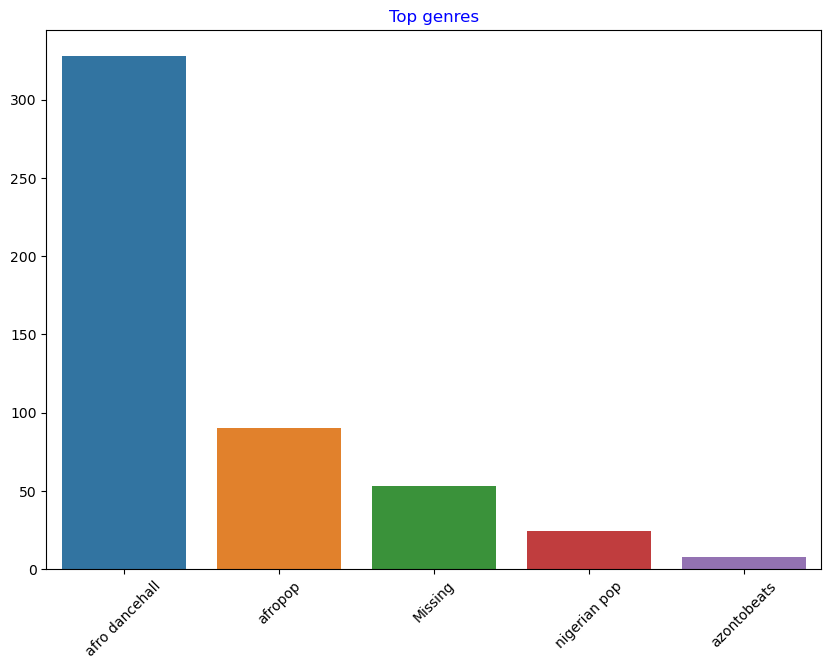

In [6]:
# Let's examine the genres. Quite a few are listed as 'Missing' which means they aren't categorized in the dataset with a genre 
import seaborn as sns

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')


Text(0.5, 1.0, 'Top genres')

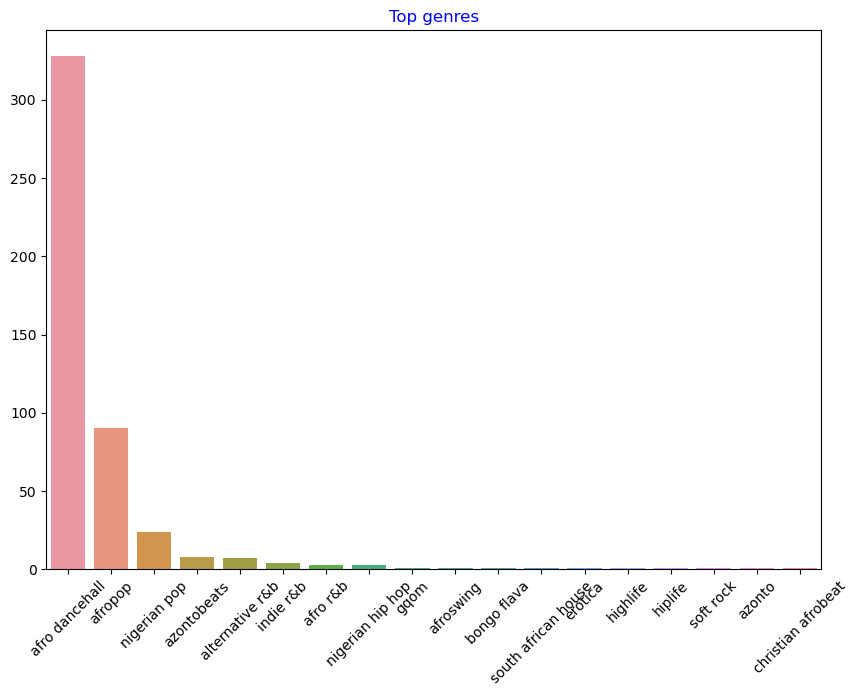

In [7]:
# Remove 'Missing' genres, as it's not classified in Spotify
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')


Text(0.5, 1.0, 'Top genres')

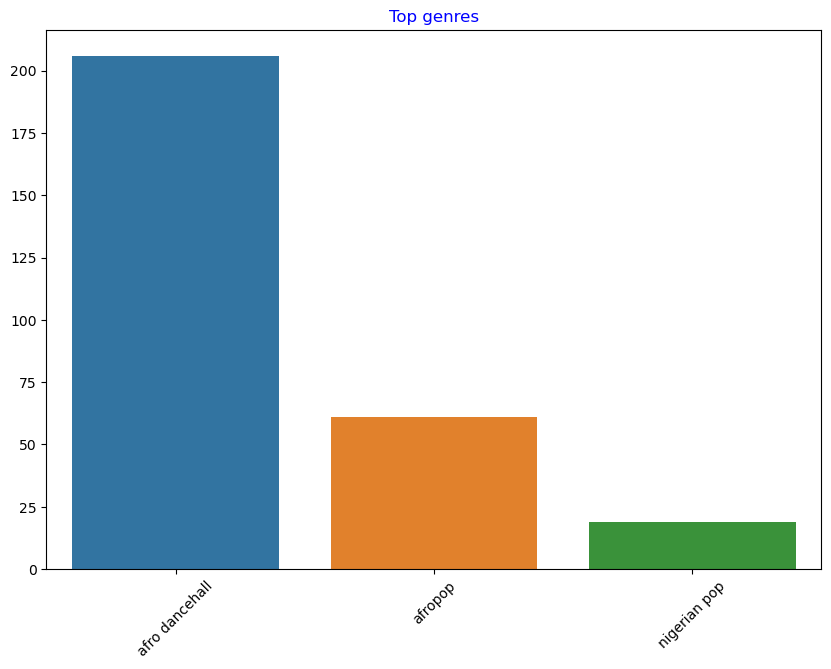

In [8]:
# The top three genres comprise the greatest part of the dataset, so let's focus on those
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

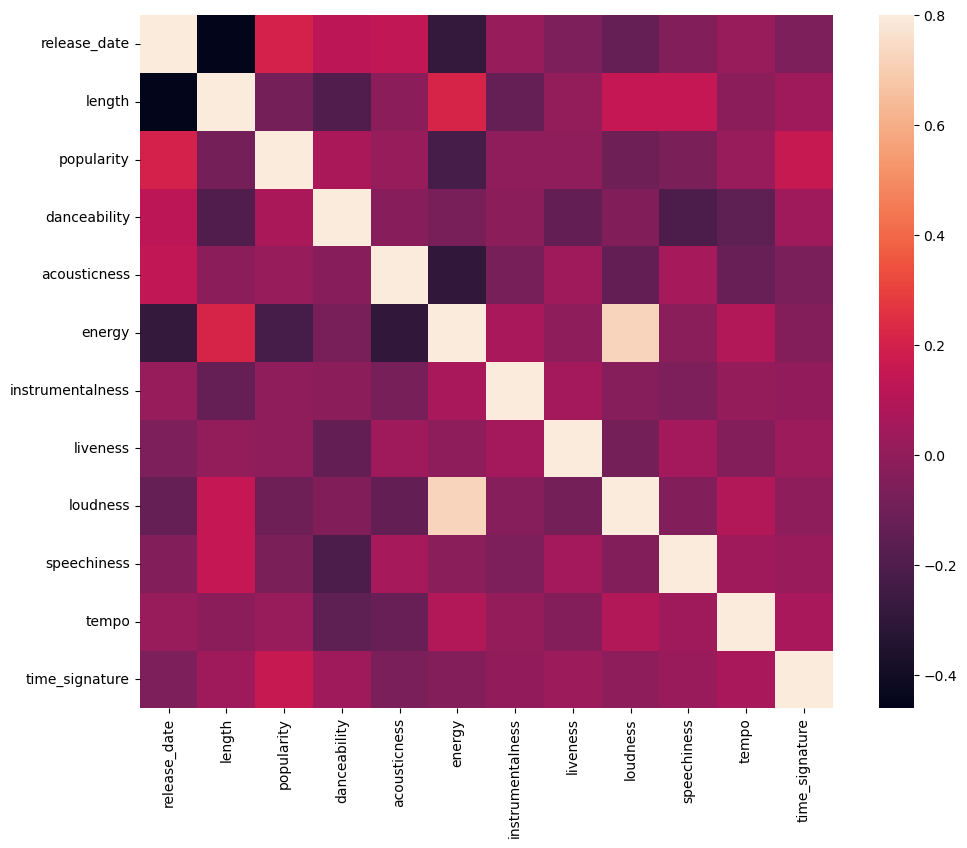

In [9]:
# The data is not strongly correlated except between energy and loudness, which makes sense. 
# Popularity has a correspondence to release data, which also makes sense, as more recent songs are probably more popular. 
# Length and energy seem to have a correlation - perhaps shorter songs are more energetic?
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

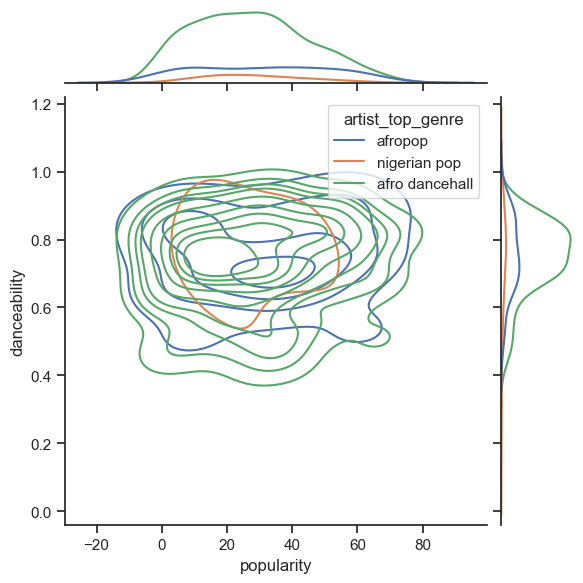

In [10]:
# Are the genres significantly different in the perception of their danceability, based on their popularity? 
# Examine our top three genres data distribution for popularity and danceability along a given x and y axis 
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

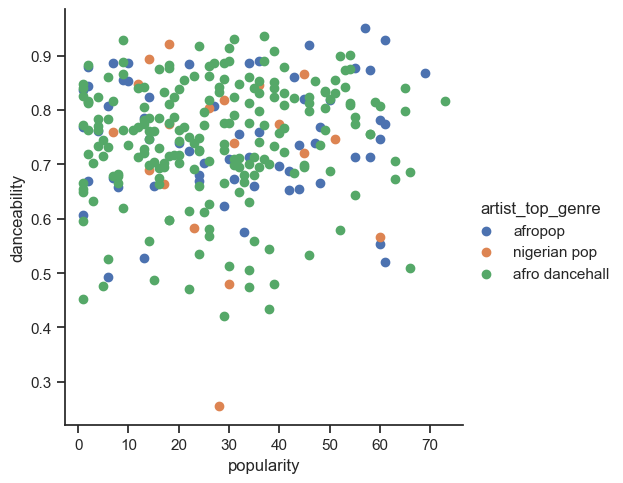

In [11]:
# In general, the three genres align in terms of their popularity and danceability.  
# A scatterplot of the same axes shows a similar pattern of convergence. 
# Try a scatterplot to check the distribution of data per genre
sns.FacetGrid(df, hue="artist_top_genre", height=5).map(plt.scatter, "popularity", "danceability").add_legend()

# 5.2 K-Means
We will focus only on 3 genres. Maybe we can get 3 clusters built. But how clean is our data? 

Check for outliers using box plots. We will concentrate on columns with fewer outliers (although you could clean out the outliers). Boxplots can show the range of the data and will help choose which columns to use. Note, Boxplots do not show variance, an important element of good clusterable data (https://stats.stackexchange.com/questions/91536/deduce-variance-from-boxplot)

<Axes: xlabel='release_date'>

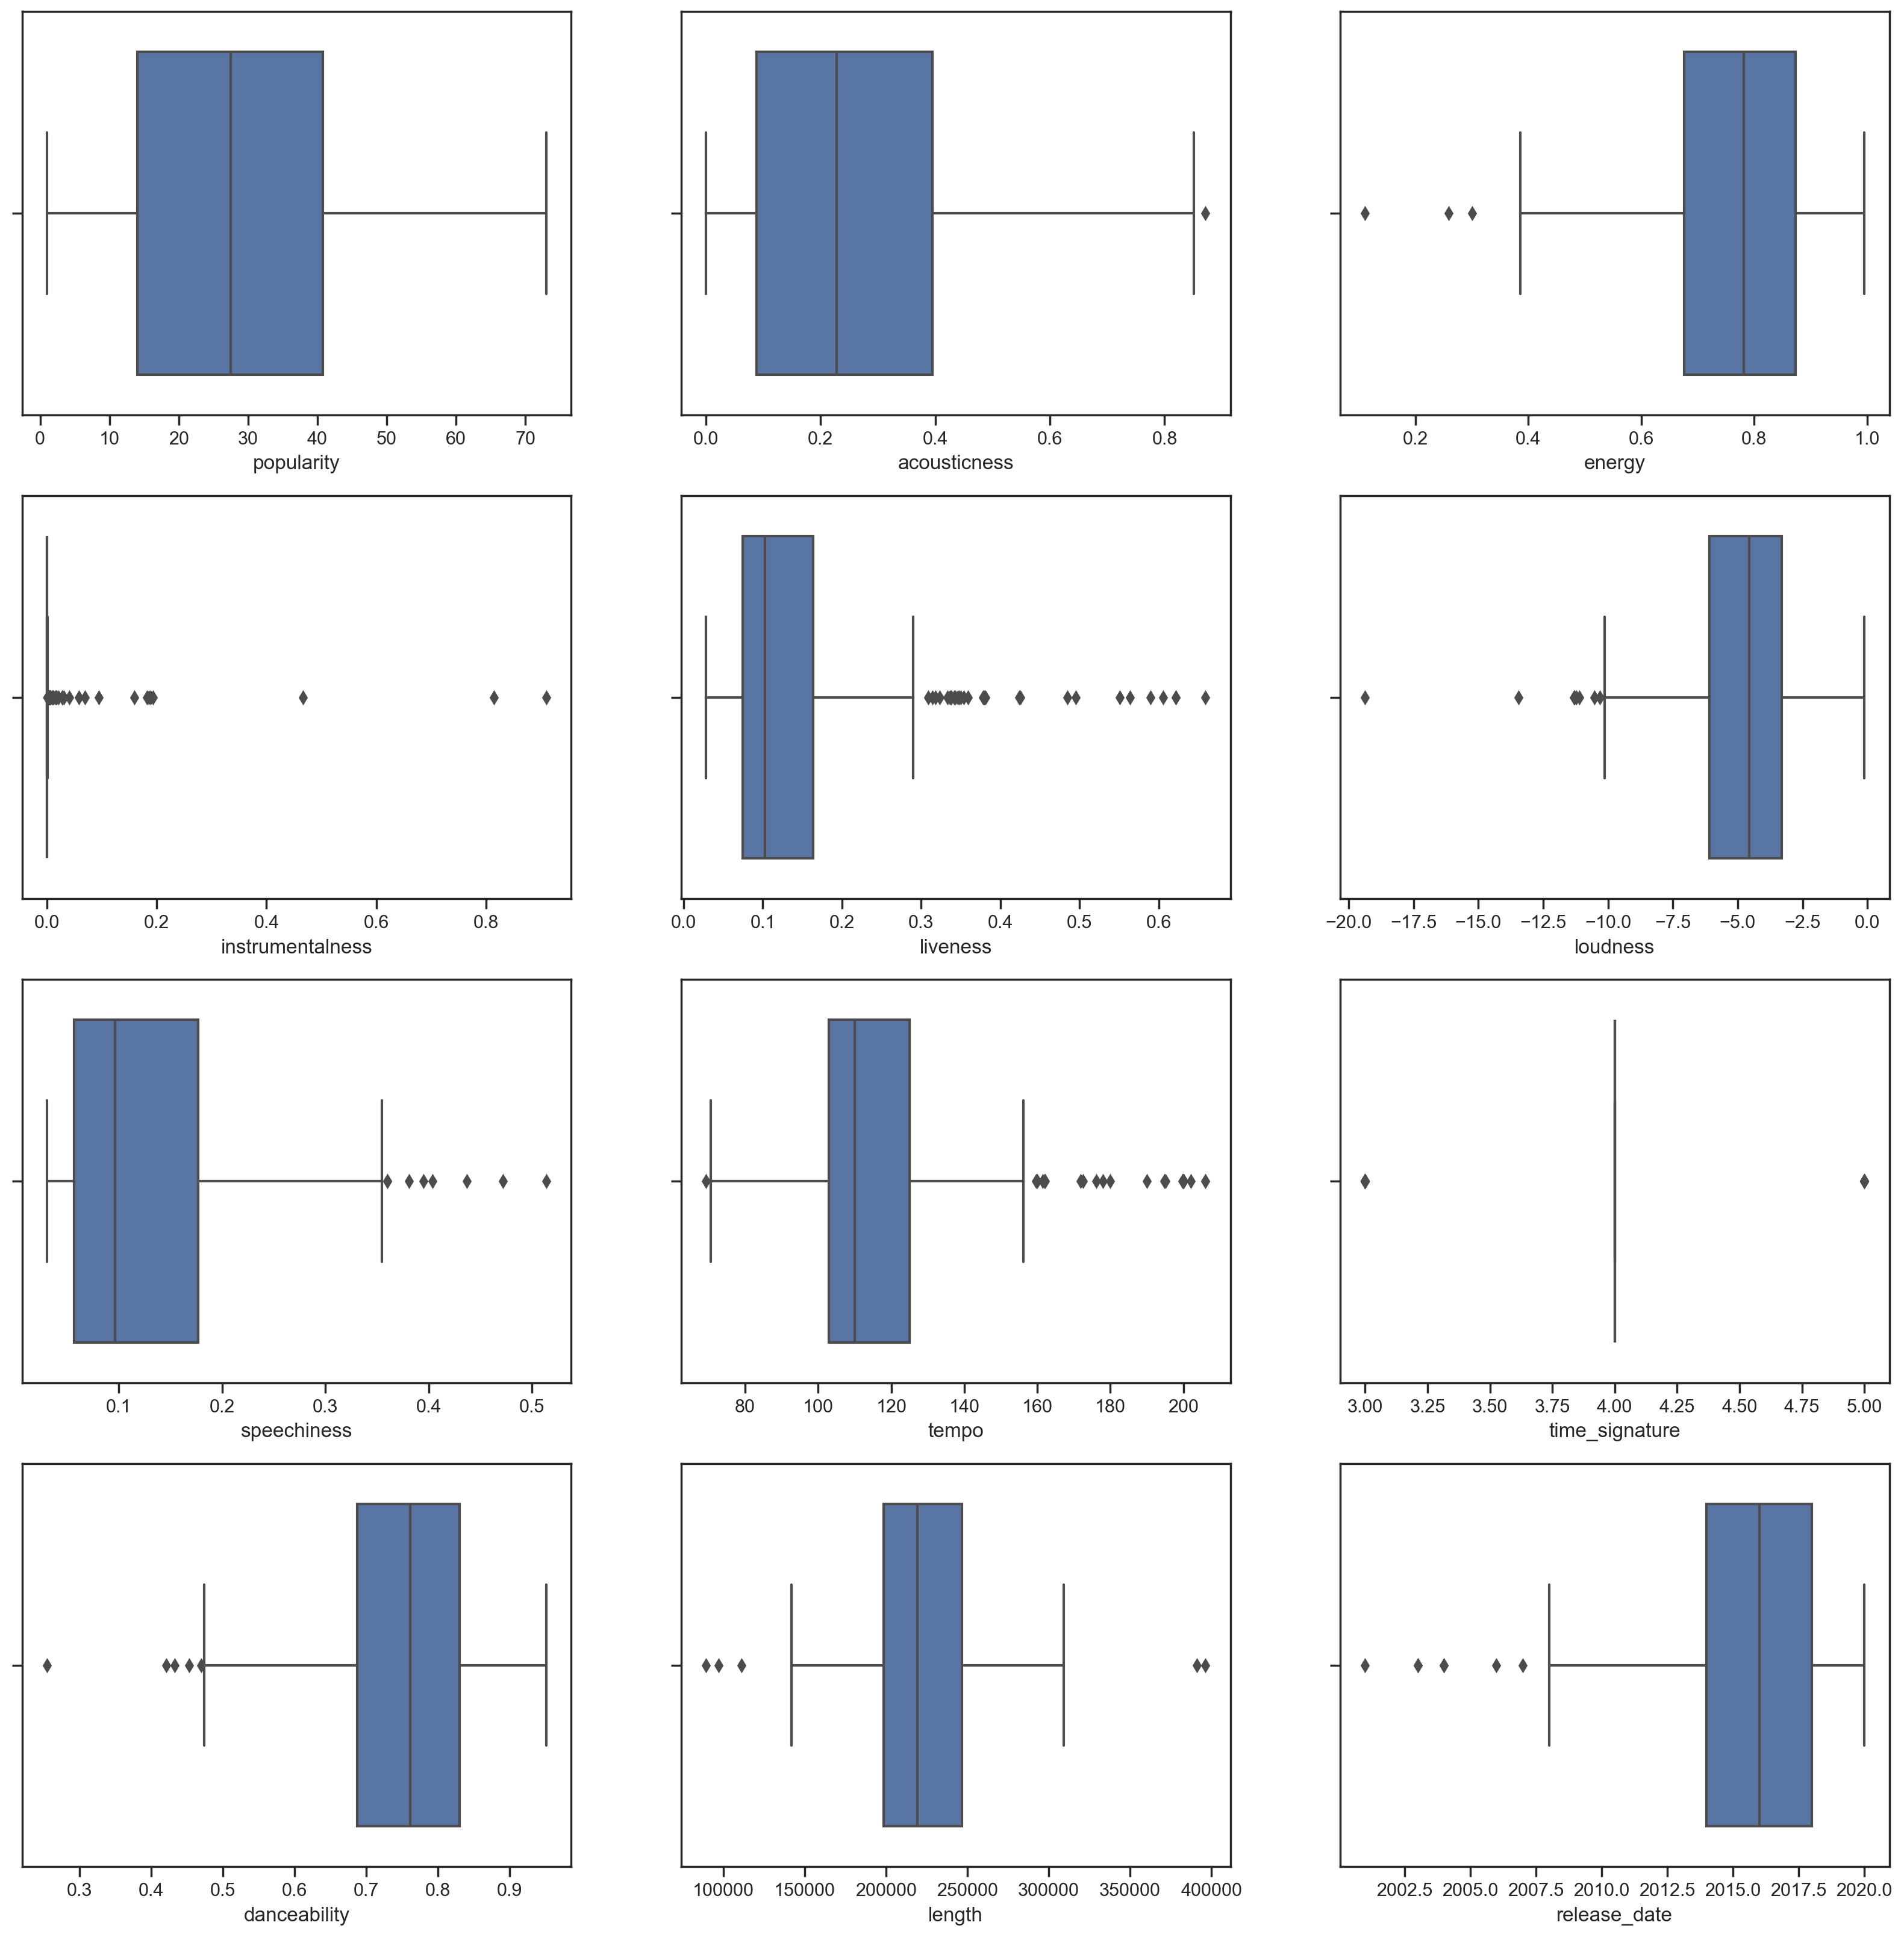

In [12]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

In [13]:
# Choose several columns with similar ranges. Make sure to include the artist_top_genre column to keep our genres straight.
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

# X = scaler.fit_transform(X)

y = le.transform(y)


In [14]:
y

array([1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [15]:
# K-Means Clustering has the drawback of needing to tell it how many clusters to build. 
# We know there are three song types, so let's focus on 3.
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed,n_init='auto')
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1],
      dtype=int32)

## 5.2.1 Evaluation


Cluster quality metrics evaluated (see [Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation) for definitions and discussions of the metrics):

| Shorthand | full name |
| ---- | ---- |
| homo | homogeneity score |
| compl | completeness score |
| v-meas | V measure |
| ARI | adjusted Rand index |
| AMI | adjusted mutual information |
| silhouette | silhouette coefficient |

**NOTE**: Homogeneity/Completeness score, V measure, ARI and AMI are all **external validity indices** - so called since they require labels (i.e., external information). 

Silhouette coefficient on the other hand only requires the data points and cluster assignments, and is an example of an **internal validity index**. Validity indices can be used to evaluate single clustering, choose k, or compare multiple clusterings. However, there are some nuances in the use of these measures and how they should be used with different clustering models, which goes beyond this course.

In [16]:
# The numbers above do not mean much to us, so let's get a 'silhouette score' to see the accuracy. 
# Our score is in the middle.
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

In [17]:
# Import KMeans and build a model
from sklearn.cluster import KMeans
wcss = []

# We'll try 10 clusters and see how the inertia changes.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

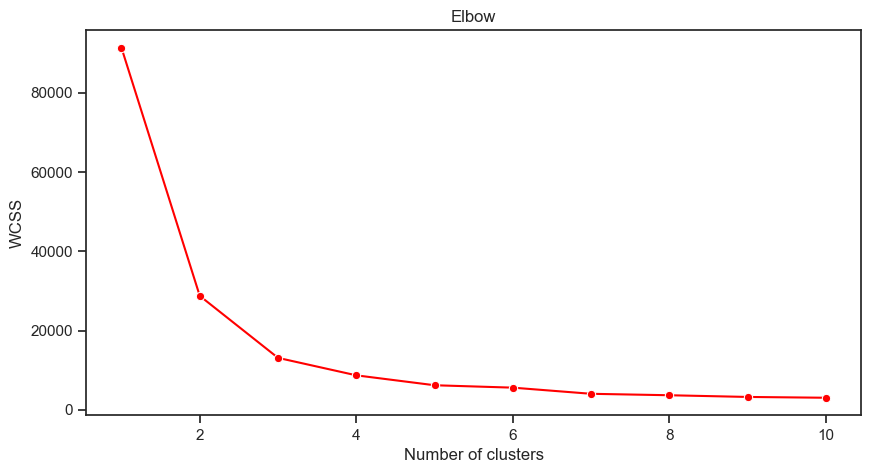

In [18]:
# Use that model to decide, using the Elbow Method, the best number of clusters to build
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looks like 3 is a good number after all. 

Fit the model again with `n_clusters=3` and create a scatterplot of your clusters. 

They do group in bunches, but they are pretty close together.

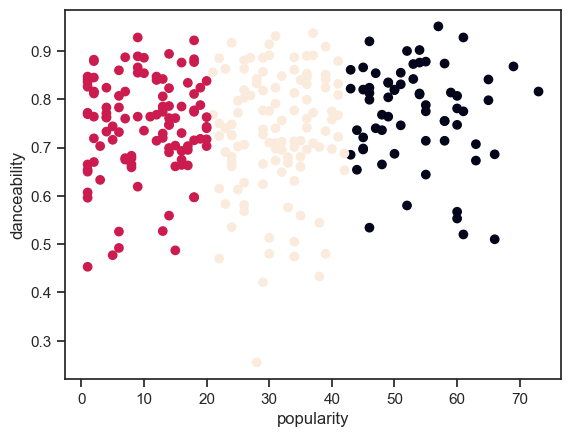

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, n_init='auto', init = 'k-means++')
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [20]:
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.3f}'. format(correct_labels/float(y.size)))

Result: 69 out of 286 samples were correctly labeled.
Accuracy score: 0.241


This model's accuracy is not bad, but not great. 

It may be that the data may not lend itself well to K-Means Clustering. You might try a different method.

# 5.3 👋 Experiments with PyCaret Clustering 

**Setup** ➡️ **Create Model** ➡️ **Assign Labels** ➡️ **Analyze Model** ➡️ (*Prediction* ➡️ *Save Model*)

In [22]:
# check installed version
# if you have issues with .venv, try issuing in MLME-23 conda environment
# mamba install seaborn=0.12.2 scikit-learn=1.2.2 numpy=1.23.5 pycaret

import pycaret
pycaret.__version__

'3.0.4'

In [37]:
from pycaret.clustering import *
# Comment the next two lines to check the setup, then
# drop name, album, artists and encode artist_top_genre
myY = le.fit_transform(mydata['artist_top_genre'])
mydata = mydata.drop(['name','album','artist','artist_top_genre'],axis=1)

mys = setup(mydata, session_id = 456)

,Description,Value
0,Session id,456
1,Original data shape,"(530, 12)"
2,Transformed data shape,"(530, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [24]:
all_metrics = get_metrics()
all_metrics

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x15fbd5630>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x15fbd57e0>,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x15fbd5870>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x15fb7a9e0>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x15fb7a8c0>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x15fb7aa70>,make_scorer(completeness_score),pred,{},True,True,False


In [38]:
# Let's start with the default of 4 clusters
mykmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5404,828.7876,0.5289,0,0,0


In [39]:
print(mykmeans)

KMeans(n_clusters=4, random_state=456)


In [27]:
mykmeans_cluster = assign_model(mykmeans)
mykmeans_cluster.head()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Cluster
0,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.014999,5,Cluster 3
1,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.992996,3,Cluster 3
2,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005005,4,Cluster 1
3,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.086998,4,Cluster 3
4,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.114998,4,Cluster 3


In [28]:
evaluate_model(mykmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [40]:
mylabels=predict_model(mykmeans,data=mydata)


In [41]:
mylabels

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Cluster
0,2019.0,144000.0,48.0,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5.0,Cluster 3
1,2020.0,89488.0,30.0,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3.0,Cluster 3
2,2018.0,207758.0,40.0,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4.0,Cluster 1
3,2019.0,175135.0,14.0,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4.0,Cluster 3
4,2018.0,152049.0,25.0,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4.0,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2015.0,193960.0,10.0,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4.0,Cluster 3
526,2015.0,252708.0,0.0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4.0,Cluster 0
527,2015.0,223159.0,0.0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4.0,Cluster 1
528,2015.0,278280.0,0.0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4.0,Cluster 0


In [46]:
# turn "Cluster n" to the number n
mylabels['Cluster'] = mylabels['Cluster'].str.replace('Cluster ','')
mylabels

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Cluster
0,2019.0,144000.0,48.0,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5.0,3
1,2020.0,89488.0,30.0,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3.0,3
2,2018.0,207758.0,40.0,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4.0,1
3,2019.0,175135.0,14.0,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4.0,3
4,2018.0,152049.0,25.0,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2015.0,193960.0,10.0,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4.0,3
526,2015.0,252708.0,0.0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4.0,0
527,2015.0,223159.0,0.0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4.0,1
528,2015.0,278280.0,0.0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4.0,0


In [48]:
myY

array([ 5,  3, 14, 16,  3, 16, 16,  3, 16,  5,  5,  3,  5, 16,  5, 16, 14,
        3,  5,  2,  3, 14, 16,  3, 16, 14,  3, 16,  5, 16,  3,  3,  3,  3,
        1,  1,  1,  1,  1, 16,  3,  1,  1,  1,  1,  1,  3,  0, 16,  3,  1,
        1,  1,  3,  1,  3,  1,  3,  1,  1,  3,  1,  1,  1,  6,  1,  1,  3,
        1,  1,  3,  3,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1, 16,
        1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  3, 17,  1,  3,  1,  1,  1,
        1,  0,  3,  0,  3,  1,  1,  1,  3,  1,  1,  1,  1,  1,  3,  1,  1,
        1, 13,  3,  1,  1,  1,  1,  3,  1,  1,  3, 10,  1,  1,  1, 15,  0,
        1,  1,  1,  0,  1,  1,  1,  1,  3,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1, 12,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  0,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,
        0,  3,  1,  1,  1,  1,  1,  3,  1,  0,  1,  1,  1,  3,  3,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 16, 16,  0,  1,
        1,  0,  3,  3,  1

In [47]:
correct_labels = sum(myY == mylabels['Cluster'])

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, myY.size))
print('Accuracy score: {0:0.3f}'. format(correct_labels/float(myY.size)))


Result: 0 out of 530 samples were correctly labeled.
Accuracy score: 0.000


*Note: pycaret uses* `predict_model()` *for predictions with unseen data*. 

## 📄 In class exercise (15 minutes): 
Experiment different setups and data using pycaret clustering for better accuracy. 
A low-hanging fruit is a higher `n_clusters`.
Remember the pycaret clustering workflow and [cheat sheet](https://pycaret.gitbook.io/docs/learn-pycaret/cheat-sheet):


**Setup** ➡️ **Create Model** ➡️ **Assign Labels** ➡️ **Analyze Model** ➡️ (*Prediction* ➡️ *Save Model*)


# Assignment 4: Experiments with tsne

## Steps to follow

The purpose of this lesson was to introduce you to K-Means clustering. There are times when K-Means is not appropriate for your data. Show that clustering using t-sne may work better. Note that t-sne is not exactly a clustering algorithm, but can be used to visualize high dimensional data. Following are links that may be helpful to you in documenting and explaining your findings.

- [How to use t-sne effectively](https://distill.pub/2016/misread-tsne/) 

- [t-sne tutorial](https://github.com/oreillymedia/t-SNE-tutorial) 

- [a very simple example of using t-sne with scikit](https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html)

## An example of how to document your work
I found that t-sne was able to "cluster" the genres fairly well. The clusters tended to be fairly tight, and most of the styes in a cluster were of the same genre. There were some clusters that were less well defined, however. For example, ... Overall, I found t-sne to be a fairly effective "clustering" algorithm for this dataset.



## Synthetic example from scikit doc
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE 

In [33]:
import numpy as np
from sklearn.manifold import TSNE

X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=3).fit_transform(X)
X_embedded

array([[ 75.14307  , -30.81881  ],
       [ -5.8793445, -60.845226 ],
       [ 44.472427 ,  49.961926 ],
       [-36.36955  ,  19.853529 ]], dtype=float32)

## t-SNE: The effect of various perplexity values on the shape
After https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

For further details, “How to Use t-SNE Effectively” https://distill.pub/2016/misread-tsne/ provides a good discussion of the effects of various parameters, as well as interactive plots to explore those effects.

In [34]:
# YOUR CODE HERE

from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=3,
    init="random",
    random_state=0,
    perplexity=3,
    learning_rate="auto",
    n_iter=300,
)
# ,,,